Version 1.0.1

# Dataset exploration (based on Pandas basics notebook from week1)

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
%matplotlib inline 


In [30]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [23]:
print("transactions head")
print(transactions.head())
print("\n\ntransactions tail")
print(transactions.tail())
# print("items")
# print(items.head())
# print("item_categories")
# print(item_categories.head())
# print("shops")
# print(shops.head())

transactions head
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

   revenue  
0   999.00  
1   899.00  
2  -899.00  
3  1709.05  
4  1099.00  


transactions tail
               date  date_block_num  shop_id  item_id  item_price  \
2935844  10.10.2015              33       25     7409       299.0   
2935845  09.10.2015              33       25     7460       299.0   
2935846  14.10.2015              33       25     7459       349.0   
2935847  22.10.2015              33       25     7440       299.0   
2935848  03.10.2015              33       25     7460       299.0   

      

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [4]:
# YOUR CODE GOES HERE
transactions["revenue"]=transactions["item_price"]*transactions["item_cnt_day"]
df_revenue = pd.DataFrame(transactions.set_index(pd.to_datetime(transactions["date"],format='%d.%m.%Y')))
grouping=pd.DataFrame(df_revenue["2014-09"],copy=True)
grouping.drop(["date","date_block_num","item_id","item_price","item_cnt_day"],axis=1,inplace=True)
grouping.reset_index(inplace=True)
grouping.drop("date",axis=1,inplace=True)

In [5]:
sums=pd.DataFrame(grouping.groupby('shop_id').sum(),copy=True)
sums['revenue'].max()

7982852.1999999564

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [6]:
grouping2=pd.DataFrame(df_revenue["2014-06":"2014-08"],copy=True)
grouping2=grouping2.merge(items,on='item_id')
grouping2.drop(["date","date_block_num","item_id","item_price","item_cnt_day","item_name","shop_id"],axis=1,inplace=True)

In [7]:
sums2=pd.DataFrame(grouping2.groupby('item_category_id').sum(),copy=True)
print(sums2['revenue'].argmax())
print(sums2['revenue'].max())

20
32157302.43


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [8]:
grouping3=pd.DataFrame(transactions[['item_id','item_price']],copy=True)
grouping3['item_price']=abs(grouping3['item_price']).round(decimals=2)
grouping3=grouping3.drop_duplicates()
sum3=grouping3.groupby('item_id').count()
sum3[sum3['item_price']==1].count()

item_price    5926
dtype: int64

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [9]:
shop_id = 25

df_filter = pd.DataFrame(transactions.set_index(pd.to_datetime(transactions["date"],format='%d.%m.%Y')))
grouping4=pd.DataFrame(df_filter["2014-12"],copy=True)
grouping5=grouping4[grouping4['shop_id']==25]

In [16]:
total_num_items_sold=grouping5.resample('D').sum()['item_cnt_day'].dropna().values
days = grouping5.resample('D').sum()['item_cnt_day'].dropna().keys().values

In [17]:
total_num_items_sold.var(ddof=1)

117167.70229885059

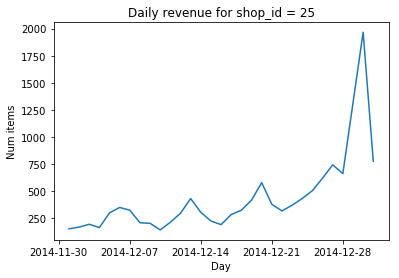

In [19]:
#total_num_items_sold = # YOUR CODE GOES HERE
#days = # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()
total_num_items_sold_var = total_num_items_sold.var(ddof=1)


# Preparing simple submittion 

<ol start="4">
  <li><b>A good exercise is to reproduce previous_value_benchmark.</b></li>
</ol>

As the name suggest - in this benchmark for the each shop/item pair our predictions are just monthly sales from the previous month, i.e. October 2015.

The most important step at reproducing this score is correctly aggregating daily data and constructing monthly sales data frame. You need to get lagged values, fill NaNs with zeros and clip the values into [0,20] range. If you do it correctly, you'll get precisely 1.16777 on the public leaderboard.

In [29]:
test_set=pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

In [38]:
df_filter=transactions.set_index(pd.to_datetime(transactions["date"],format='%d.%m.%Y'))["2015-10"]
df_october=pd.DataFrame(df_filter,copy=True)


In [58]:
df_october_groupped = pd.DataFrame(df_october.groupby(['shop_id','item_id']).sum()['item_cnt_day']).reset_index()

In [109]:
predictions = pd.merge(test_set,df_october_groupped,
                       left_on=('shop_id','item_id'), right_on=('shop_id','item_id'), how='left')
##filling NAs
predictions.item_cnt_day=predictions.item_cnt_day.fillna(0.0)
## clipping
predictions.loc[predictions.item_cnt_day>20,'item_cnt_day']=20
predictions.loc[predictions.item_cnt_day<0,'item_cnt_day']=0
##dropping extra colums and indexes after merge
predictions.drop(labels=['shop_id','item_id'],axis=1,inplace=True)
predictions.rename(columns={'item_cnt_day':'item_cnt_month'},inplace=True)

# converting  ID back to int
predictions.ID = predictions.ID.astype(int)


In [110]:
filename = 'submition_{}.csv'.format(time.strftime('%Y_%m_%d_%H_%M',time.localtime()))
filename = os.path.join(DATA_FOLDER,filename)
predictions.to_csv(filename,index=False)

<table>
  <tr>
    <th>Name</th>
    <th>Submitted</th>
    <th>Score</th>
  </tr>
  <tr>
    <th>submition_2019_06_03_09_29.csv.gz</th>
    <th>just now </th>
    <th>1.16777</th>
    </tr>
</table>
